In [1]:
# get started with our D-02 dataset
import zipfile
import os
zip = 'preprocessed .zip'
ext_path = 'preprocessed_data'
with zipfile.ZipFile(zip, 'r') as zip_ref:
    zip_ref.extractall(ext_path)

# List the extracted files to check the content
extracted_files = os.listdir(ext_path)
extracted_files

['allrounder.csv',
 'batting.csv',
 'bowling.csv',
 'ODI(BABAR AZAM).csv',
 'ODI(SHAHEEN SHAH AFRIDI).csv',
 'T20I(BABAR AZAM).csv',
 'T20i(SHAHEEN SHAH AFRIDI).csv',
 'TEST(BABAR AZAM).csv',
 'TEST(SHAHEEN SHAH AFRIDI).csv']

## Dataset Preprocessing
- Combine relevant player data
- Clean and preprocess
- Label Creation (already done)

In [2]:
import pandas as pd

# Define paths to the key CSV files
batting_path = os.path.join(ext_path, 'batting.csv')
bowling_path = os.path.join(ext_path, 'bowling.csv')
allrounder_path = os.path.join(ext_path, 'allrounder.csv')

# Load the files into DataFrames
batting_df = pd.read_csv(batting_path)
bowling_df = pd.read_csv(bowling_path)
allrounder_df = pd.read_csv(allrounder_path)

# Display basic information for each DataFrame to understand their structure
batting_info = batting_df.head(), batting_df.info()
bowling_info = bowling_df.head(), bowling_df.info()
allrounder_info = allrounder_df.head(), allrounder_df.info()

batting_info, bowling_info, allrounder_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   210 non-null    object 
 1   Span     210 non-null    object 
 2   Matches  210 non-null    int64  
 3   Inns     210 non-null    int64  
 4   NO       210 non-null    int64  
 5   Runs     210 non-null    int64  
 6   HS       210 non-null    object 
 7   AVG      210 non-null    float64
 8   BF       210 non-null    int64  
 9   SR       210 non-null    float64
 10  100      210 non-null    int64  
 11  50       210 non-null    int64  
 12  0        210 non-null    int64  
 13  4s       210 non-null    int64  
 14  6s       210 non-null    int64  
 15  format   210 non-null    object 
 16  Label    210 non-null    int64  
dtypes: float64(2), int64(11), object(4)
memory usage: 28.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 18 columns):
 #  

((           Player       Span  Matches  Inns  NO  Runs    HS    AVG     BF  \
  0       Azhar Ali  2013-2022       73   136   7  5331  302*  41.32  12499   
  1      Babar Azam  2016-2024       54    98   9  3962   196  44.51   7252   
  2     Asad Shafiq  2013-2020       61   104   3  3766   137  37.28   7479   
  3     Younis Khan  2013-2017       39    75   8  3534   218  52.74   6930   
  4  Sarfaraz Ahmed  2013-2023       53    93  14  3025   118  38.29   4287   
  
        SR  100  50   0   4s  6s format  Label  
  0  42.65   15  22  14  510  19   Test      1  
  1  54.63    9  26   8  459  23   Test      1  
  2  50.35   10  21  10  408  24   Test      1  
  3  50.99   14   7   5  328  33   Test      1  
  4  70.56    4  21   4  309   9   Test      1  ,
  None),
 (                Player       Span  Matches  Inns   Overs  Mdns  Runs  Wkts  \
  0           Yasir Shah  2014-2022       48    89  2375.5   359  7657   244   
  1  Shaheen Shah Afridi  2018-2024       30    52  1001.0 

In [3]:
# Check for missing values in each dataset
missing_values_batting = batting_df.isnull().sum()
missing_values_bowling = bowling_df.isnull().sum()
missing_values_allrounder = allrounder_df.isnull().sum()

missing_values_batting, missing_values_bowling, missing_values_allrounder


(Player     0
 Span       0
 Matches    0
 Inns       0
 NO         0
 Runs       0
 HS         0
 AVG        0
 BF         0
 SR         0
 100        0
 50         0
 0          0
 4s         0
 6s         0
 format     0
 Label      0
 dtype: int64,
 Player       0
 Span         0
 Matches      0
 Inns         0
 Overs        0
 Mdns         0
 Runs         0
 Wkts         0
 BBI          0
 BBM        100
 AVG          0
 Eco          0
 sr           0
 5            0
 10           0
 4            0
 format       0
 Label        0
 dtype: int64,
 Player      0
 Span        0
 Matches     0
 Runs        0
 HS          0
 Bat AVG     0
 100         0
 wcts        0
 BBI         0
 Bowl AVG    0
 5           0
 Ct          0
 St          0
 Ave Diff    0
 format      0
 Label       0
 dtype: int64)

In [4]:
# Drop the 'BBM' column from the bowling DataFrame
bowling_df = bowling_df.drop(columns=['BBM'])

# Standardize column names for consistency
# Renaming batting and allrounder specific columns to align with other datasets
batting_df = batting_df.rename(columns={'AVG': 'Bat AVG', '4s': 'Fours', '6s': 'Sixes'})
bowling_df = bowling_df.rename(columns={'AVG': 'Bowl AVG', 'sr': 'SR'})
allrounder_df = allrounder_df.rename(columns={'wcts': 'Wkts', 'Bowl AVG': 'Bowl AVG', 'Bat AVG': 'Bat AVG'})

# Display the column names after renaming for confirmation
batting_df.columns, bowling_df.columns, allrounder_df.columns


(Index(['Player', 'Span', 'Matches', 'Inns', 'NO', 'Runs', 'HS', 'Bat AVG',
        'BF', 'SR', '100', '50', '0', 'Fours', 'Sixes', 'format', 'Label'],
       dtype='object'),
 Index(['Player', 'Span', 'Matches', 'Inns', 'Overs', 'Mdns', 'Runs', 'Wkts',
        'BBI', 'Bowl AVG', 'Eco', 'SR', '5', '10', '4', 'format', 'Label'],
       dtype='object'),
 Index(['Player', 'Span', 'Matches', 'Runs', 'HS', 'Bat AVG', '100', 'Wkts',
        'BBI', 'Bowl AVG', '5', 'Ct', 'St', 'Ave Diff', 'format', 'Label'],
       dtype='object'))

In [5]:
# Merge the batting, bowling, and all-rounder DataFrames on 'Player' and 'Span'
main_df = pd.merge(batting_df, bowling_df, on=['Player', 'Span', 'format', 'Label'], how='outer', suffixes=('_bat', '_bowl'))
main_df = pd.merge(main_df, allrounder_df, on=['Player', 'Span', 'format', 'Label'], how='outer', suffixes=('', '_all'))

# Display a sample of the merged DataFrame to confirm the merge
main_df.head()


,Player,Span,Matches_bat,Inns_bat,NO,Runs_bat,HS,Bat AVG,BF,SR_bat,...,HS_all,Bat AVG_all,100_all,Wkts_all,BBI_all,Bowl AVG_all,5_all,Ct,St,Ave Diff
0,Azhar Ali,2013-2022,73.0,136.0,7.0,5331.0,302*,41.32,12499.0,42.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Babar Azam,2016-2024,54.0,98.0,9.0,3962.0,196,44.51,7252.0,54.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Asad Shafiq,2013-2020,61.0,104.0,3.0,3766.0,137,37.28,7479.0,50.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Younis Khan,2013-2017,39.0,75.0,8.0,3534.0,218,52.74,6930.0,50.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sarfaraz Ahmed,2013-2023,53.0,93.0,14.0,3025.0,118,38.29,4287.0,70.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
main_df.columns

Index(['Player', 'Span', 'Matches_bat', 'Inns_bat', 'NO', 'Runs_bat', 'HS',
       'Bat AVG', 'BF', 'SR_bat', '100', '50', '0', 'Fours', 'Sixes', 'format',
       'Label', 'Matches_bowl', 'Inns_bowl', 'Overs', 'Mdns', 'Runs_bowl',
       'Wkts', 'BBI', 'Bowl AVG', 'Eco', 'SR_bowl', '5', '10', '4', 'Matches',
       'Runs', 'HS_all', 'Bat AVG_all', '100_all', 'Wkts_all', 'BBI_all',
       'Bowl AVG_all', '5_all', 'Ct', 'St', 'Ave Diff'],
      dtype='object')

In [7]:
# Identify columns with a high percentage of missing values
missing_percentage = main_df.isnull().mean() * 100

# Impute remaining missing values with mean or median as appropriate
# For simplicity, we'll use median values to preserve distributions
main_df = main_df.fillna(main_df.median(numeric_only=True))

# Check the DataFrame structure and confirm missing values have been addressed
missing_values_after = main_df.isnull().sum().sum()  # Total count of remaining missing values
main_df.head(), missing_values_after


(           Player       Span  Matches_bat  Inns_bat    NO  Runs_bat    HS  \
 0       Azhar Ali  2013-2022         73.0     136.0   7.0    5331.0  302*   
 1      Babar Azam  2016-2024         54.0      98.0   9.0    3962.0   196   
 2     Asad Shafiq  2013-2020         61.0     104.0   3.0    3766.0   137   
 3     Younis Khan  2013-2017         39.0      75.0   8.0    3534.0   218   
 4  Sarfaraz Ahmed  2013-2023         53.0      93.0  14.0    3025.0   118   
 
    Bat AVG       BF  SR_bat  ...  HS_all  Bat AVG_all  100_all  Wkts_all  \
 0    41.32  12499.0   42.65  ...     NaN         12.1      0.0      16.0   
 1    44.51   7252.0   54.63  ...     NaN         12.1      0.0      16.0   
 2    37.28   7479.0   50.35  ...     NaN         12.1      0.0      16.0   
 3    52.74   6930.0   50.99  ...     NaN         12.1      0.0      16.0   
 4    38.29   4287.0   70.56  ...     NaN         12.1      0.0      16.0   
 
    BBI_all Bowl AVG_all  5_all   Ct   St  Ave Diff  
 0      NaN 

Load optimal profiles

In [8]:
optimal_batter_df = pd.read_csv('preprocessed_data/ODI(BABAR AZAM).csv')
optimal_bowler_df = pd.read_csv('preprocessed_data/ODI(SHAHEEN SHAH AFRIDI).csv')
optimal_batter_df.head(), optimal_bowler_df.head()

(  Bat1  Runs  BF      SR  4s  6s  Opposition     Ground   Start Date
 0   54    54  60   90.00   4   0   vZimbabwe     Lahore  31 May 2015
 1   25    25  30   83.33   3   0  vSri Lanka   Dambulla  11 Jul 2015
 2   12    12  19   63.15   1   0  vSri Lanka  Pallekele  15 Jul 2015
 3  62*    62  62  100.00   2   4    vEngland  Abu Dhabi  11 Nov 2015
 4    4     4   6   66.66   0   0    vEngland  Abu Dhabi  13 Nov 2015,
    Overs  Mdns  Runs  Wkts  Econ    Ave    SR    Opposition        Ground  \
 0   10.0     0    38     2  3.80  19.00  30.0  vAfghanistan     Abu Dhabi   
 1    6.0     0    42     0  7.00      -     -        vIndia  Dubai (DICS)   
 2   10.0     1    47     2  4.70  23.50  30.0   vBangladesh     Abu Dhabi   
 3    8.0     1    46     4  5.75  11.50  12.0  vNew Zealand     Abu Dhabi   
 4    9.0     1    38     4  4.22   9.50  13.5  vNew Zealand     Abu Dhabi   
 
     Start Date  
 0  21 Sep 2018  
 1  23 Sep 2018  
 2  26 Sep 2018  
 3   7 Nov 2018  
 4   9 Nov 2018  )

In [9]:
# Compute benchmarks for the optimal batter (Babar Azam)
optimal_batter_benchmarks = {
    'Runs': optimal_batter_df['Runs'].mean(),
    'SR': optimal_batter_df['SR'].mean(),
    '4s': optimal_batter_df['4s'].mean(),
    '6s': optimal_batter_df['6s'].mean()
}

# Compute benchmarks for the optimal bowler (Shaheen Afridi)
optimal_bowler_benchmarks = {
    'Wkts': optimal_bowler_df['Wkts'].mean(),
    'Econ': optimal_bowler_df['Econ'].mean(),
    'Ave': pd.to_numeric(optimal_bowler_df['Ave'], errors='coerce').mean(),
    'SR': pd.to_numeric(optimal_bowler_df['SR'], errors='coerce').mean()
}

print("Optimal Batter Benchmarks:", optimal_batter_benchmarks)
print("Optimal Bowler Benchmarks:", optimal_bowler_benchmarks)


Optimal Batter Benchmarks: {'Runs': 50.25438596491228, 'SR': 80.03447368421057, '4s': 4.56140350877193, '6s': 0.5263157894736842}
Optimal Bowler Benchmarks: {'Wkts': 2.0, 'Econ': 5.465384615384617, 'Ave': 26.81088888888889, 'SR': 28.41333333333333}


In [10]:
batter_candidates = main_df[
    (main_df['Runs_bat'] >= optimal_batter_benchmarks['Runs']) &
    (main_df['SR_bat'] >= optimal_batter_benchmarks['SR']) &
    (main_df['Fours'] >= optimal_batter_benchmarks['4s']) &
    (main_df['Sixes'] >= optimal_batter_benchmarks['6s'])
]

# Filter for players who meet or exceed optimal benchmarks for bowling
bowler_candidates = main_df[
    (main_df['Wkts'] >= optimal_bowler_benchmarks['Wkts']) &
    (main_df['Eco'] <= optimal_bowler_benchmarks['Econ']) &
    (main_df['Bowl AVG'] <= optimal_bowler_benchmarks['Ave']) &
    (main_df['SR_bowl'] <= optimal_bowler_benchmarks['SR'])
]

allround_candidates = main_df[
    (main_df['Runs_bat'] >= optimal_batter_benchmarks['Runs']) &
    (main_df['SR_bat'] >= optimal_batter_benchmarks['SR']) &
    (main_df['Wkts_all'] >= optimal_bowler_benchmarks['Wkts']) &
    (main_df['Bowl AVG_all'] <= optimal_bowler_benchmarks['Ave']) &
    (main_df['Bat AVG_all'] <= optimal_bowler_benchmarks['Ave'])
]

# Display filtered squads
print("Batter Candidates:\n", batter_candidates)
print("Bowler Candidates:\n", bowler_candidates)
print("All Rounder Candidates:\n", allround_candidates)

Batter Candidates:
                  Player       Span  Matches_bat  Inns_bat    NO  Runs_bat  \
27          Sohail Khan  2016-2016          7.0      11.0   2.0     241.0   
65           Babar Azam  2015-2023        117.0     114.0  13.0    5729.0   
66      Mohammad Hafeez  2012-2019        111.0     109.0  11.0    3819.0   
67         Fakhar Zaman  2017-2023         82.0      81.0   6.0    3492.0   
68          Imam-ul-Haq  2017-2023         72.0      71.0   6.0    3138.0   
..                  ...        ...          ...       ...   ...       ...   
274         Agha Salman  2022-2023         13.5      11.0   2.0     139.0   
275          Fawad Alam  2014-2015         13.5      11.0   2.0     139.0   
276  Mohammad Nawaz (3)  2016-2024         13.5      11.0   2.0     139.0   
277       Shahid Afridi  2012-2016         13.5      11.0   2.0     139.0   
278       Hussain Talat  2018-2021         13.5      11.0   2.0     139.0   

       HS  Bat AVG      BF  SR_bat  ...  HS_all  Bat AV

In [11]:
# Identify columns with missing values
missing_values_bat = batter_candidates.isnull().sum()
missing_values_bowl = bowler_candidates.isnull().sum()
missing_values_all = allround_candidates.isnull().sum()

print("Missing values in batter candidates:\n", missing_values_bat)
print("Missing values in bowler candidates:\n", missing_values_bowl)
print("Missing values in allrounder candidates:\n", missing_values_all)

# Fill missing values for numeric columns with median
numeric_cols_bat = batter_candidates.select_dtypes(include=['float64', 'int64']).columns
batter_candidates[numeric_cols_bat] = batter_candidates[numeric_cols_bat].fillna(batter_candidates[numeric_cols_bat].median())

numeric_cols_bowl = bowler_candidates.select_dtypes(include=['float64', 'int64']).columns
bowler_candidates[numeric_cols_bowl] = bowler_candidates[numeric_cols_bowl].fillna(bowler_candidates[numeric_cols_bowl].median())

numeric_cols_all = allround_candidates.select_dtypes(include=['float64', 'int64']).columns
allround_candidates[numeric_cols_all] = allround_candidates[numeric_cols_all].fillna(allround_candidates[numeric_cols_all].median())


# Fill missing values for categorical columns with 'Unknown'
categorical_cols_bat = batter_candidates.select_dtypes(include=['object']).columns
batter_candidates[categorical_cols_bat] = batter_candidates[categorical_cols_bat].fillna('Unknown')

categorical_cols_bowl = bowler_candidates.select_dtypes(include=['object']).columns
bowler_candidates[categorical_cols_bowl] = bowler_candidates[categorical_cols_bowl].fillna('Unknown')

categorical_cols_all = allround_candidates.select_dtypes(include=['object']).columns
allround_candidates[categorical_cols_all] = allround_candidates[categorical_cols_all].fillna('Unknown')

# Remove duplicates
batter_candidates = batter_candidates.drop_duplicates()
bowler_candidates = bowler_candidates.drop_duplicates()
allround_candidates = allround_candidates.drop_duplicates()

# Verify preprocessing
print("Batter Candidates after preprocessing:\n", batter_candidates.head())
print("Bowler Candidates after preprocessing:\n", bowler_candidates.head())
print("All Rounder Candidates after preprocessing:\n", allround_candidates.head())

Missing values in batter candidates:
 Player            0
Span              0
Matches_bat       0
Inns_bat          0
NO                0
Runs_bat          0
HS               69
Bat AVG           0
BF                0
SR_bat            0
100               0
50                0
0                 0
Fours             0
Sixes             0
format            0
Label             0
Matches_bowl      0
Inns_bowl         0
Overs             0
Mdns              0
Runs_bowl         0
Wkts              0
BBI              58
Bowl AVG          0
Eco               0
SR_bowl           0
5                 0
10                0
4                 0
Matches           0
Runs              0
HS_all          101
Bat AVG_all       0
100_all           0
Wkts_all          0
BBI_all         101
Bowl AVG_all      0
5_all             0
Ct                0
St                0
Ave Diff          0
dtype: int64
Missing values in bowler candidates:
 Player          0
Span            0
Matches_bat     0
Inns_bat        0

C:\Users\ammar\AppData\Local\Temp\ipykernel_4056\2377929082.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batter_candidates[numeric_cols_bat] = batter_candidates[numeric_cols_bat].fillna(batter_candidates[numeric_cols_bat].median())
C:\Users\ammar\AppData\Local\Temp\ipykernel_4056\2377929082.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowler_candidates[numeric_cols_bowl] = bowler_candidates[numeric_cols_bowl].fillna(bowler_candidates[numeric_cols_bowl].median())
C:\Users\ammar\AppData\Local\

In [12]:
# add label to optimal players
batter_candidates['Label'] = 1
bowler_candidates['Label'] = 1
allround_candidates['Label'] = 1

# now load dataset and label the nonoptimal players
# Label remaining players as non-optimal (0)
non_optimal_players = main_df[~main_df['Player'].isin(
    pd.concat([batter_candidates['Player'], bowler_candidates['Player'], allround_candidates['Player']])
)].copy()
non_optimal_players['Label'] = 0

# combiine the trainiing data
training_data = pd.concat([batter_candidates, bowler_candidates, allround_candidates, non_optimal_players], ignore_index=True)
training_data.head()

,Player,Span,Matches_bat,Inns_bat,NO,Runs_bat,HS,Bat AVG,BF,SR_bat,...,HS_all,Bat AVG_all,100_all,Wkts_all,BBI_all,Bowl AVG_all,5_all,Ct,St,Ave Diff
0,Sohail Khan,2016-2016,7.0,11.0,2.0,241.0,65,26.77,298.0,80.87,...,65,26.77,0.0,26.0,5/68,33.84,2.0,2.0,0.0,-7.06
1,Babar Azam,2015-2023,117.0,114.0,13.0,5729.0,158,56.72,6455.0,88.75,...,Unknown,12.10,0.0,16.0,Unknown,33.66,0.0,3.0,0.0,-17.56
2,Mohammad Hafeez,2012-2019,111.0,109.0,11.0,3819.0,140*,38.96,4532.0,84.26,...,Unknown,12.10,0.0,16.0,Unknown,33.66,0.0,3.0,0.0,-17.56
3,Fakhar Zaman,2017-2023,82.0,81.0,6.0,3492.0,210*,46.56,3737.0,93.44,...,Unknown,12.10,0.0,16.0,Unknown,33.66,0.0,3.0,0.0,-17.56
4,Imam-ul-Haq,2017-2023,72.0,71.0,6.0,3138.0,151,48.27,3801.0,82.55,...,Unknown,12.10,0.0,16.0,Unknown,33.66,0.0,3.0,0.0,-17.56


## Feature selection

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Adjust feature selection to include only available batting-related metrics
features = training_data[['Runs_bat', 'SR_bat', 'Fours', 'Sixes', 'Wkts', 'Eco', 'Bowl AVG', 'SR_bowl']]
target = training_data['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display a sample of the standardized training data for verification
X_train_scaled[:5], y_train[:5].values


(array([[-0.33718108, -0.28586809, -0.3116156 , -0.40156158,  1.11218417,
         -1.76947364, -0.02642663,  1.25112032],
        [-0.33718108, -0.28586809, -0.3116156 , -0.40156158,  3.3087286 ,
         -0.11169589, -0.40768361, -0.53415244],
        [-0.33718108, -0.28586809, -0.3116156 , -0.40156158, -0.81539562,
         -0.16560737,  0.92780099,  0.46918027],
        [-0.33718108, -0.28586809, -0.3116156 , -0.40156158, -0.68091331,
         -0.11169589, -1.36914571, -1.22659333],
        [-0.33718108, -0.28586809, -0.3116156 , -0.40156158, -0.546431  ,
         -0.81254502,  3.31517866,  3.15415514]]),
 array([1, 1, 1, 1, 1], dtype=int64))

## Model Application

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

accuracy, precision, recall, f1


(0.9545454545454546,
 0.9655172413793104,
 0.9655172413793104,
 0.9655172413793104)

### Additional ML models

In [15]:
del zip

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

# Train and evaluate each model
results = {}

for model_name, model in zip(['Logistic Regression', 'Random Forest', 'SVM'], [logistic_regression, random_forest, svm]):
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Display the results for each model
results


{'Logistic Regression': {'Accuracy': 0.8181818181818182,
  'Precision': 0.8181818181818182,
  'Recall': 0.9310344827586207,
  'F1 Score': 0.8709677419354839},
 'Random Forest': {'Accuracy': 0.9318181818181818,
  'Precision': 0.9333333333333333,
  'Recall': 0.9655172413793104,
  'F1 Score': 0.9491525423728815},
 'SVM': {'Accuracy': 0.8181818181818182,
  'Precision': 0.7837837837837838,
  'Recall': 1.0,
  'F1 Score': 0.8787878787878788}}

In [17]:
results['Decision Tree'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

## DL model ANN

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

AttributeError: module 'numpy.typing' has no attribute 'NDArray'

In [ ]:
dl_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

dl_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'X_train_scaled' is not defined

In [ ]:
history = dl_model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_split=0.2)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6745 - loss: 0.6480 - val_accuracy: 0.8571 - val_loss: 0.6088
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8419 - loss: 0.5670 - val_accuracy: 0.7714 - val_loss: 0.5728
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8677 - loss: 0.5063 - val_accuracy: 0.7429 - val_loss: 0.5550
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8039 - loss: 0.4936 - val_accuracy: 0.8000 - val_loss: 0.5403
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8722 - loss: 0.4395 - val_accuracy: 0.8286 - val_loss: 0.5285
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8361 - loss: 0.4420 - val_accuracy: 0.8571 - val_loss: 0.5219
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8546 - loss: 0.4432 - val_accuracy: 0.8571 - val_loss: 0.5154
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8534 - loss: 0.4013 - val_accuracy: 0.8571 - val_loss

In [ ]:
dl_loss, dl_accuracy = dl_model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", dl_accuracy)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8778 - loss: 0.2251 
Test Accuracy: 0.8636363744735718


In [ ]:
# for remaining metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get predictions (as probabilities, then convert to 0 or 1 labels with a threshold of 0.5)
y_pred_proba = dl_model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).reshape(-1)  # Reshape to 1D array

# Calculate performance metrics
dl_accuracy = accuracy_score(y_test, y_pred)
dl_precision = precision_score(y_test, y_pred, zero_division=1)
dl_recall = recall_score(y_test, y_pred, zero_division=1)
dl_f1 = f1_score(y_test, y_pred, zero_division=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [ ]:
results['DL Model'] = {
    'Accuracy': dl_accuracy,
    'Precision': dl_precision,
    'Recall': dl_recall,
    'F1 Score': dl_f1
}


In [ ]:
results

{'Logistic Regression': {'Accuracy': 0.8863636363636364,
  'Precision': 0.8529411764705882,
  'Recall': 1.0,
  'F1 Score': 0.9206349206349206},
 'Random Forest': {'Accuracy': 0.9545454545454546,
  'Precision': 1.0,
  'Recall': 0.9310344827586207,
  'F1 Score': 0.9642857142857143},
 'SVM': {'Accuracy': 0.8181818181818182,
  'Precision': 0.7837837837837838,
  'Recall': 1.0,
  'F1 Score': 0.8787878787878788},
 'Decision Tree': {'Accuracy': 0.8181818181818182,
  'Precision': 0.7837837837837838,
  'Recall': 1.0,
  'F1 Score': 0.8787878787878788},
 'DL Model': {'Accuracy': 0.8636363636363636,
  'Precision': 0.8285714285714286,
  'Recall': 1.0,
  'F1 Score': 0.90625}}

# Visualization of results

> Bar Chart for Model Performance Metrics

---


A grouped bar chart to compare Accuracy, Precision, Recall, and F1 Score across all models.
This gives a clear side-by-side comparison of each metric for every model.

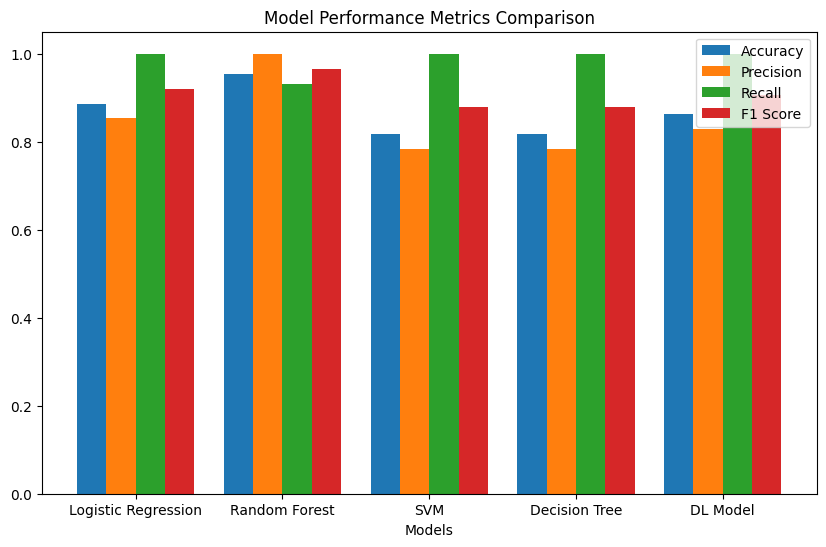

In [ ]:
import matplotlib.pyplot as plt

# Convert dictionary to DataFrame for easier plotting

import matplotlib.pyplot as plt
import numpy as np

# Prepare data
model_names = list(results.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
data = {metric: [results[model][metric] for model in model_names] for metric in metrics}

# Plot
x = np.arange(len(model_names))  # The label locations
width = 0.2  # The width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each metric
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, data[metric], width, label=metric)

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_title('Model Performance Metrics Comparison')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()




> Radar chart for metric profiles
---

A radar chart (spider plot) for each model to visualize how well-rounded it is across the four metrics.
This gives a holistic view of model performance in all areas.


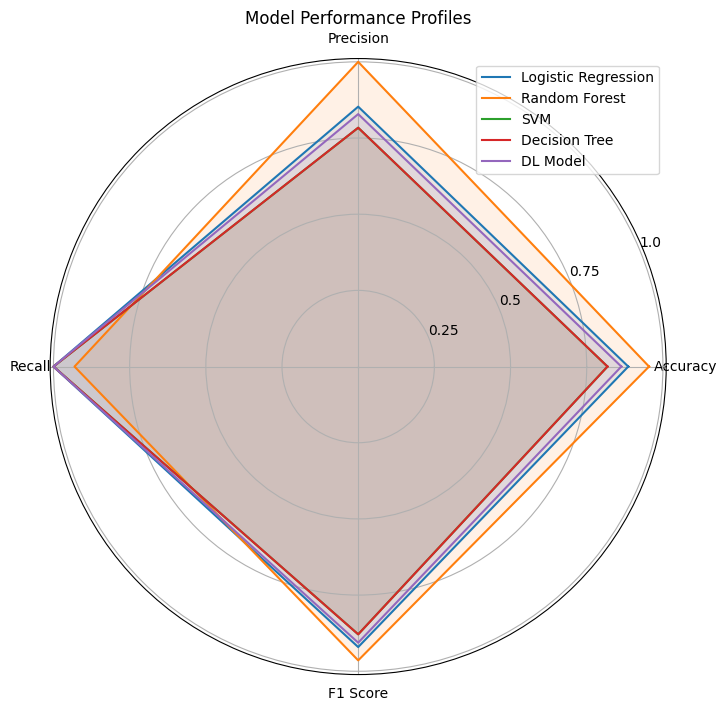

In [ ]:
from math import pi

# Prepare data
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
num_vars = len(categories)

# Normalize values between 0 and 1 (optional, if required)
normalized_results = {model: [results[model][metric] for metric in categories] for model in results}

# Radar plot setup
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Close the circle

# Plot each model
for model, values in normalized_results.items():
    values += values[:1]  # Close the circle
    ax.plot(angles, values, label=model)
    ax.fill(angles, values, alpha=0.1)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_yticks([0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['0.25', '0.5', '0.75', '1.0'])
ax.set_title('Model Performance Profiles')
ax.legend(loc='upper right')

plt.show()


> Horizontal Bar Chart for Each Metric
---
Create individual horizontal bar charts for Accuracy, Precision, Recall, and F1 Score to emphasize performance differences in specific metrics.


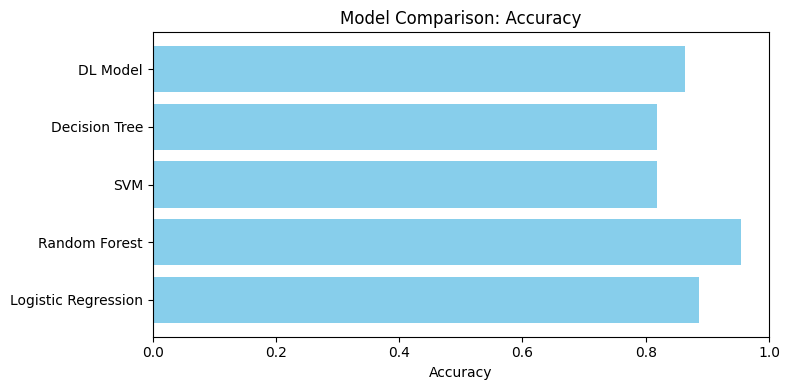

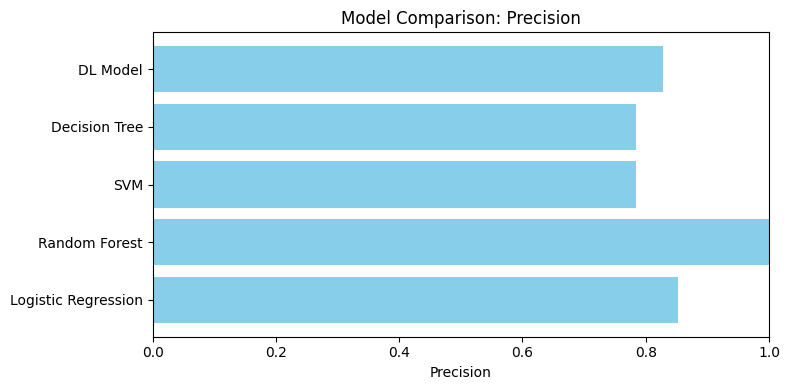

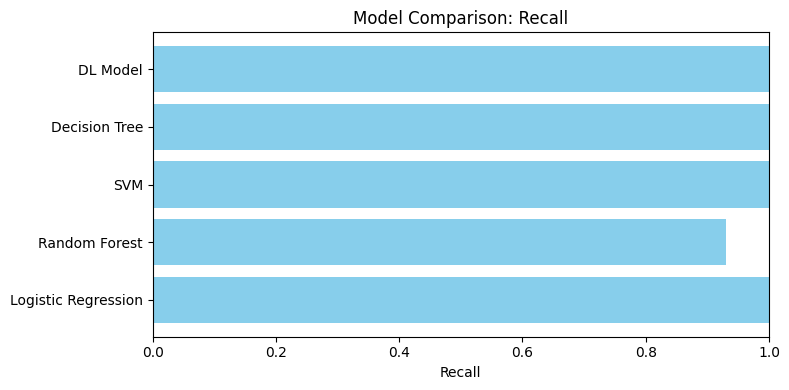

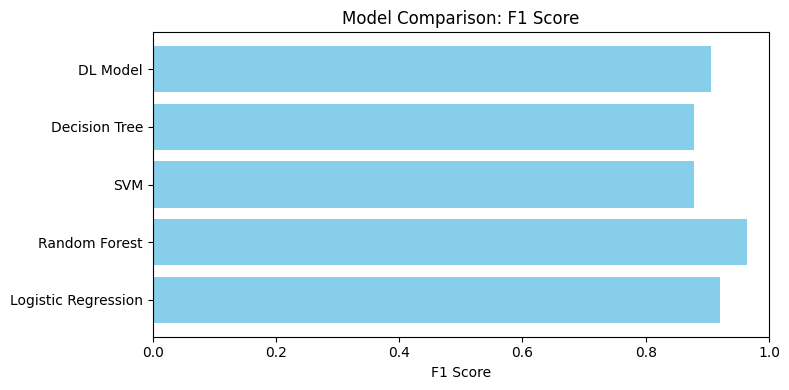

In [ ]:
# Plot each metric as a separate horizontal bar chart
for metric in metrics:
    values = data[metric]
    plt.figure(figsize=(8, 4))
    plt.barh(model_names, values, color='skyblue')
    plt.xlabel(metric)
    plt.title(f'Model Comparison: {metric}')
    plt.xlim(0, 1)  # Metrics range between 0 and 1

    # Adjust subplot parameters for tight layout
    plt.subplots_adjust(left=0.25)  # Increase left margin for labels

    plt.tight_layout()
    plt.show()

> Heatmap for Model Metrics
---
Use a heatmap to show performance metrics as intensities for each model.


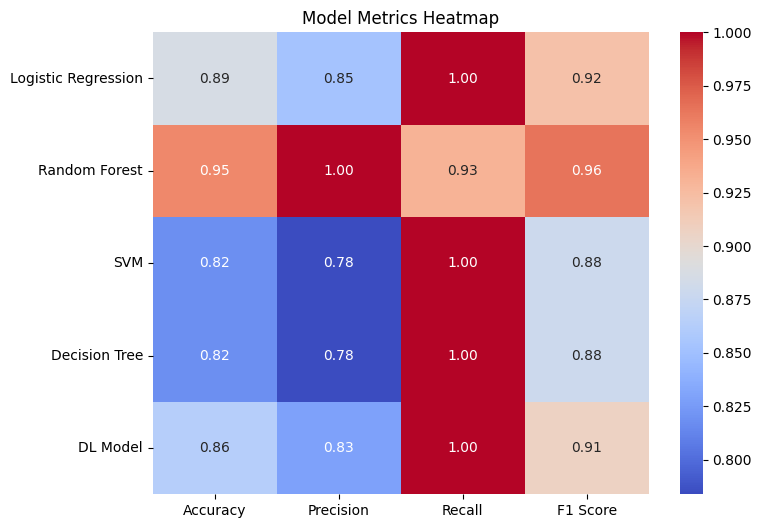

In [ ]:
import seaborn as sns
import pandas as pd

# Convert results to DataFrame
performance_df = pd.DataFrame(results).T

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(performance_df, annot=True, cmap='coolwarm', cbar=True, fmt='.2f')
plt.title('Model Metrics Heatmap')
plt.show()


Get predicted optimal team from best performing model

In [ ]:
# Find the model with the highest accuracy
best_model = performance_df['Accuracy'].idxmax()
highest_accuracy = performance_df.loc[best_model, 'Accuracy']

print(f"The model with the highest accuracy is {best_model} with an accuracy of {highest_accuracy}")

The model with the highest accuracy is Random Forest with an accuracy of 0.9545454545454546


> Feature Importance Plot
---
feature importance is a critical output for our best model.

It shows which features contributed most to the classification of optimal players.


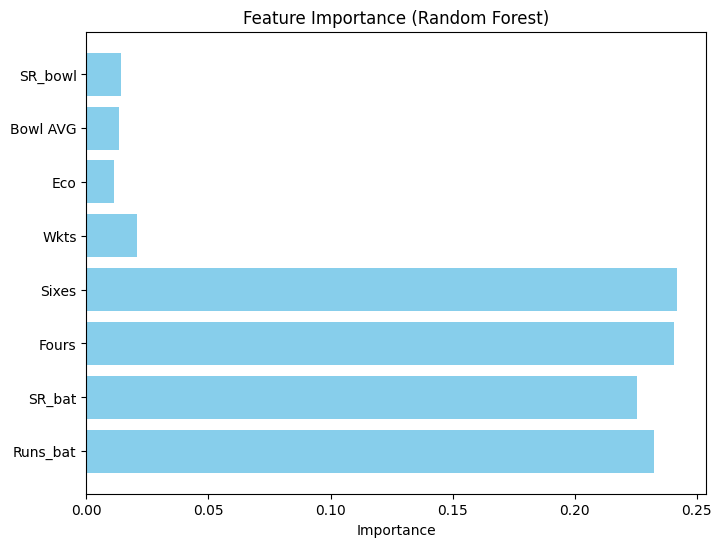

In [ ]:
# Feature Importance for Random Forest
importances = random_forest.feature_importances_
feature_names = features.columns

plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()


> ROC Curve (Receiver Operating Characteristic Curve)

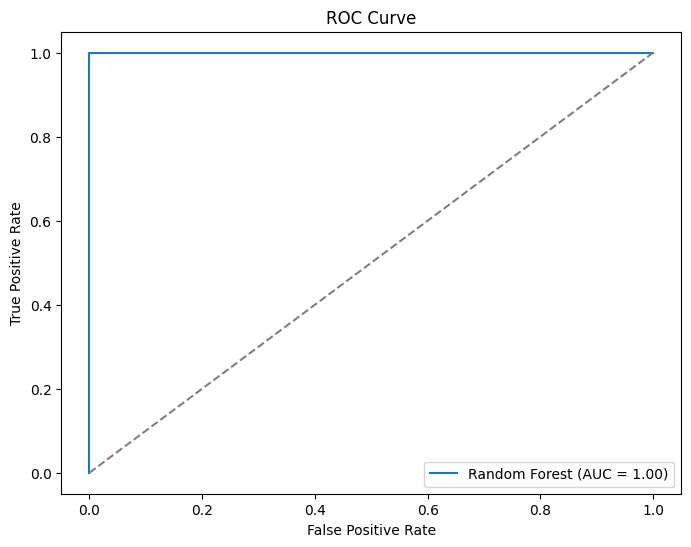

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve for Random Forest
y_pred_prob = random_forest.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


and lets focus on the best classifier heatmap

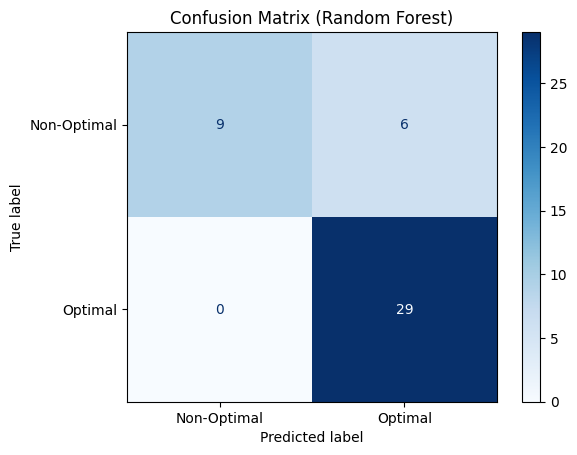

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Optimal', 'Optimal'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.show()


> Predicted Optimal Team Composition
---
A pie chart to visualize the proportion of batters, bowlers, and all-rounders in the predicted optimal team.

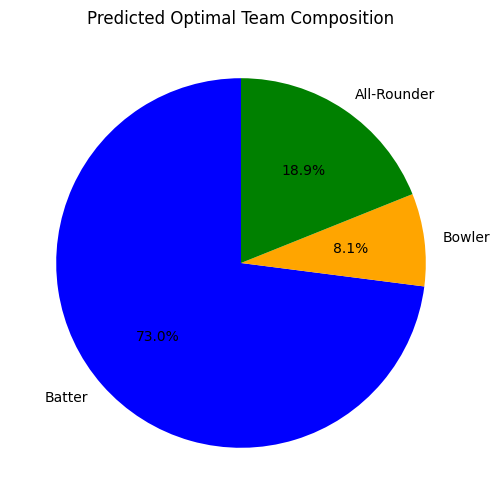

In [ ]:
# Count the number of players in each role
optimal_team = predicted_optimal_team['Player']
roles = ['Batter', 'Bowler', 'All-Rounder']
role_counts = [
    len(optimal_team[optimal_team.isin(batter_candidates['Player'])]),
    len(optimal_team[optimal_team.isin(bowler_candidates['Player'])]),
    len(optimal_team[optimal_team.isin(allround_candidates['Player'])])
]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(role_counts, labels=roles, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green'])
plt.title('Predicted Optimal Team Composition')
plt.show()


In [ ]:
# Predict optimal players using the Random Forest model
optimal_team_predictions = random_forest.predict(X_test_scaled)

# Add predictions to the test set for reference
X_test['Predicted_Label'] = optimal_team_predictions
X_test['Player'] = y_test.index  # Assuming player names are indexed in y_test

# Filter the test set to show only players predicted as optimal (Label = 1)
predicted_optimal_team = X_test[X_test['Predicted_Label'] == 1]
predicted_optimal_team = predicted_optimal_team.merge(training_data[['Player']], left_index=True, right_index=True, how='left')

# Drop Player_x and rename Player_y
predicted_optimal_team = predicted_optimal_team.drop(columns=['Player_x'], errors='ignore')
predicted_optimal_team = predicted_optimal_team.rename(columns={'Player_y': 'Player'})

# Display the predicted optimal team after modifications
print("Predicted Optimal Team:")
predicted_optimal_team[['Player', 'Runs_bat', 'SR_bat', 'Fours', 'Sixes', 'Wkts', 'Eco', 'Bowl AVG', 'SR_bowl']]

Predicted Optimal Team:


,Player,Runs_bat,SR_bat,Fours,Sixes,Wkts,Eco,Bowl AVG,SR_bowl
100,Shaheen Shah Afridi,146.0,126.95,7.0,11.0,12.0,5.545,33.835,42.3
139,Zaman Khan,139.0,81.44,14.0,3.0,7.0,7.490,33.710,27.0
15,Asif Ali,577.0,133.87,27.0,37.0,12.0,5.545,33.835,42.3
154,Shadab Khan,139.0,81.44,14.0,3.0,107.0,7.240,23.570,19.5
73,Mohammad Nawaz (3),406.0,88.64,27.0,11.0,12.0,5.545,33.835,42.3
140,Zulfiqar Babar,139.0,81.44,14.0,3.0,12.0,7.110,15.410,13.0
30,Haider Ali,505.0,124.69,43.0,22.0,12.0,5.545,33.835,42.3
9,Ahmed Shehzad,1326.0,115.80,136.0,31.0,12.0,5.545,33.835,42.3
67,Mohammad Hafeez,139.0,81.44,14.0,3.0,29.0,6.490,22.790,21.0
18,Babar Azam,5729.0,88.75,520.0,60.0,12.0,5.545,33.835,42.3


To visualize this in Power BI, export the predicted_optimal_team DataFrame as a CSV:

In [ ]:
predicted_optimal_team.to_csv("predicted_optimal_team.csv", index=False)

We have duplicates due to matching in both formats in any context (batting, bowling or batting, allrounder)

In [ ]:
# get a more comprehensive player profile for dashboards

# Remove exact duplicates based on all columns
predicted_optimal_team_unique = predicted_optimal_team.drop_duplicates()

# Aggregate statistics by Player to provide a single entry per player
predicted_optimal_team_aggregated = predicted_optimal_team.groupby('Player', as_index=False).agg({
    'Runs_bat': 'mean',     # Average runs (or use 'sum' if you want the total)
    'SR_bat': 'mean',       # Average strike rate
    'Fours': 'sum',         # Total fours
    'Sixes': 'sum',         # Total sixes
    'Wkts': 'sum',          # Total wickets
    'Eco': 'mean',          # Average economy rate
    'Bowl AVG': 'mean',     # Average bowling average
    'SR_bowl': 'mean'       # Average bowling strike rate
})

predicted_optimal_team_aggregated.to_csv("cleaned_predicted_optimal_team.csv", index=False)